# Libraries

In [23]:
import numpy as np
import pandas as pd
import operator
from copy import deepcopy
from math import log

# Load Data

In [24]:
filepath = './data/spliceATrainKIS.dat'
data = []

In [25]:
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        data.append(line.strip())
        line = fp.readline()
        cnt += 1

In [26]:
cutNr = int(data[0])

In [27]:
cutNr

68

In [28]:
data = data[1:]

In [29]:
data = np.reshape(a=data, newshape=(int(11576/2), 2))

In [30]:
df = pd.DataFrame(data, columns=['y', "seq"])

In [31]:
df.y = pd.to_numeric(df.y)
classes = list(df.y)

In [32]:
attributes = set("".join([i for i in df.seq]))

In [33]:
sequences = np.array([list(i) for i in df.seq])

In [34]:
attributes


{'A', 'C', 'G', 'N', 'S', 'T'}

# Filotrowanie N i S

In [35]:
def filterLetter(data, sequences):
    dataTemporal = deepcopy(data)
    idxsN = [idx   for  idx, sequence in enumerate(sequences) if np.where(sequence=='N')[0].size]
    idxsS = [idx   for  idx, sequence in enumerate(sequences) if np.where(sequence=='S')[0].size]
    indices = np.concatenate((idxsN, idxsS))
    for i in sorted(np.unique(indices), reverse=True):
        del dataTemporal[i]
#     np.save('test.npy', data)
    print(len(dataTemporal))
    return dataTemporal
# data2 = np.load('test.npy')

In [37]:
dataF = filterLetter(list(data), sequences)
dfF = pd.DataFrame(dataF, columns=['y', "seq"])
dfF.y = pd.to_numeric(dfF.y)
classesF = list(dfF.y)
attributesF = set("".join([i for i in dfF.seq]))
sequencesF = np.array([list(i) for i in dfF.seq])

5768


In [38]:
data = dataF
df = dfF
classes = classesF
attributes = attributesF
sequences = sequencesF

In [39]:
attributes

{'A', 'C', 'G', 'T'}

# Algorytm 

zbiór klas 'c'- czy jest prawdziwy czy nie (1 & 0)

zbiór obiektów 's' - zbiór kolejnych przykładów

zbiór atrybutów poza klasą 'r'- zbiór unikalnych liter

## częstość i-tej klasy

In [40]:
p = [{c: 0 for c in attributes} for i in range(sequences.shape[1])]
n = deepcopy(p)
pAn = deepcopy(p)
for ridx, row in enumerate(sequences):
    for cidx, column in enumerate(row):
        pAn[cidx][column] += 1
        if df.y[ridx] == 1:
            p[cidx][column] += 1
        else:
            n[cidx][column] += 1
        

mam zliczoną ilość wystąpień klejnych klas w danych numerach algorytmu

In [41]:
p[:5]

[{'G': 307, 'T': 290, 'A': 261, 'C': 252},
 {'G': 317, 'T': 263, 'A': 265, 'C': 265},
 {'G': 291, 'T': 281, 'A': 254, 'C': 284},
 {'G': 336, 'T': 266, 'A': 259, 'C': 249},
 {'G': 310, 'T': 258, 'A': 255, 'C': 287}]

In [42]:
n[:5]

[{'G': 1355, 'T': 1141, 'A': 1005, 'C': 1157},
 {'G': 1291, 'T': 1185, 'A': 1050, 'C': 1132},
 {'G': 1267, 'T': 1176, 'A': 1037, 'C': 1178},
 {'G': 1252, 'T': 1192, 'A': 1036, 'C': 1178},
 {'G': 1273, 'T': 1181, 'A': 1045, 'C': 1159}]

In [43]:
pAn[:5]

[{'G': 1662, 'T': 1431, 'A': 1266, 'C': 1409},
 {'G': 1608, 'T': 1448, 'A': 1315, 'C': 1397},
 {'G': 1558, 'T': 1457, 'A': 1291, 'C': 1462},
 {'G': 1588, 'T': 1458, 'A': 1295, 'C': 1427},
 {'G': 1583, 'T': 1439, 'A': 1300, 'C': 1446}]

In [19]:
def id3(classes, attributes, sequences):
    """
    c- list of classes
    r- list of atributes
    s- list of objects
    """
    if not sequences:
        return -1
    if classes.count(classes[0]) == len(x):
        return classes[0]
    if not attributes:
        stats = {label: list(classes).count(label)  for label in np.unique(classes)}
        max(stats.items(), key=operator.itemgetter(1))[0]
    #atrybut maksymalizujący InfGain(D, S)
    d = 0

## atrybut maksimalizujący infGain

### entropia zbioru

In [44]:
def calculate_frequency(pAn):
    """
    p = list of dictionaries caunting positive
    n - list of dictionaries counting negative
    y - output (0, 1)
    """
    totalInRow = [sum(row.values()) for row in pAn]
    frequencies = deepcopy(pAn)
    for row, rowSum in zip(frequencies, totalInRow):
        for key in row:
            row[key] = row[key]/rowSum
    return frequencies
frequencies = calculate_frequency(pAn)

In [45]:
def calculate_entropyLabel(labels):
    p = 0
    n = 0
    for ridx, row in enumerate(labels):
        if row == 1:
            p += 1
        else:
            n += 1
    pf = p/len(labels)
    nf = n/len(labels)
    entropy = -pf*log(pf, 2)-nf*log(nf, 2)
    return entropy

In [46]:
entropyL = calculate_entropyLabel(classes)

policzyc entropy dla outlook z przykładu zeby sprawdzic dzialanie

In [47]:
def singleEntropy(f, nrF):
    """
    Funkcja liczy entropie dla pojedynczego podzbioru cechy
    """
    return -f*log(f, nrF)
def entropy(e1, e2, *rest):
    """
    liczy entropie dla cechy
    """
    args = np.concatenate(([e1, e2], rest)).astype(float) 
    fs = [arg/sum(args) for arg in args]
    return sum([singleEntropy(f, len(fs)) for f in fs])
    

In [49]:
def informationGain(class1, class2, feature):
    #licze entropie E(S)
    es = entropy(class1, class2)
#     if not rest:
#         eArgsP = np.array([e1pair, e2pair]).astype(float)
#     else:
#         eArgsP = np.concatenate(([e1pair, e2pair], rest)).astype(float)
    eArgsP = np.array(feature).astype(float)
    # sumuje pozytywne i negatywne w eArgs
    eArgs = [sum(e) for e in eArgsP]
    #licze czestotliwosci 
    fs = [arg/sum(eArgs) for arg in eArgs]
    fsAtributes = [[value/sum(attribute) for value in attribute] for attribute in eArgsP]
    #licze entropie dla calosci
    entropies = [entropy(value[0], value[1]) for value in fsAtributes]
    return es-sum([entropy*f for f, entropy in zip(fs, entropies)])

In [53]:
#licze liczebnosc klas dobre/zle (target)
class1 = classes.count(1)
class2 = classes.count(0)
print(len(classes), " ", (class1), " ", (class2))
print(len(p), " ", len(n))

5768   1110   4658
90   90


In [54]:
#biore pary pobry/zly z poszczególnych cech i ich mozliwych opcji
ePairs = []
keys = p[0].keys()
for featureP, featureN in zip(p, n):
    ePair = [(featureP[key], featureN[key]) for key in keys]
    ePairs.append(ePair)
    print(ePair)
    print()

[(307, 1355), (290, 1141), (261, 1005), (252, 1157)]

[(317, 1291), (263, 1185), (265, 1050), (265, 1132)]

[(291, 1267), (281, 1176), (254, 1037), (284, 1178)]

[(336, 1252), (266, 1192), (259, 1036), (249, 1178)]

[(310, 1273), (258, 1181), (255, 1045), (287, 1159)]

[(321, 1289), (280, 1173), (258, 1050), (251, 1146)]

[(301, 1247), (319, 1205), (260, 1049), (230, 1157)]

[(336, 1227), (263, 1181), (273, 1064), (238, 1186)]

[(343, 1222), (269, 1206), (262, 993), (236, 1237)]

[(329, 1223), (277, 1180), (256, 1069), (248, 1186)]

[(314, 1179), (264, 1293), (261, 1019), (271, 1167)]

[(302, 1219), (264, 1182), (276, 1062), (268, 1195)]

[(358, 1191), (275, 1225), (241, 1024), (236, 1218)]

[(328, 1144), (257, 1294), (266, 999), (259, 1221)]

[(335, 1191), (259, 1265), (261, 1006), (255, 1196)]

[(343, 1130), (292, 1230), (256, 1026), (219, 1272)]

[(319, 1080), (271, 1328), (250, 979), (270, 1271)]

[(295, 1114), (285, 1317), (243, 943), (287, 1284)]

[(302, 1117), (304, 1314), (255,

In [58]:
ePairs[69]

[(1110, 4658), (0, 0), (0, 0), (0, 0)]

In [59]:
informationGainResults = [informationGain(class1, class2, pair) for pair in ePairs  ]

/home/jakubb/PW/sem8/pszt/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [60]:
informationGainR = np.nan_to_num(informationGainResults)

In [69]:
result = np.where(informationGainR == np.amax(informationGainR))
print(result)
np.amax(informationGainR)


(array([67]),)


0.16704801144108694

# Wyjasnienie dzialania entropii

In [21]:
import numpy as np
from math import log
import matplotlib.pyplot as plt
zakres = np.linspace(0,1).astype(float)
zakres[0] = 0.0000001

In [23]:
y = [i*log(i, 2) for i in zakres]

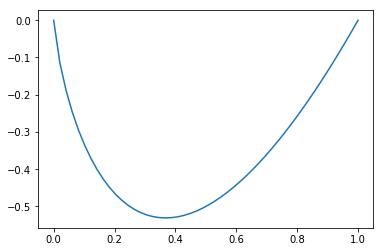

In [24]:
plt.plot(zakres, y)